<center><b>Assignment for Business Intelligence Summer 2021 Internship</b></center>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import datetime as dt

## Reading data from csv files:

In [2]:
df1=pd.read_csv('BI-Intern first_purchases.csv',date_parser=True)
df2=pd.read_csv('BI-Intern purchases.csv',date_parser=True)

In [3]:
df1

,User First Purchase Month,First Purchase Product Line,User ID,Purchase ID,Venue ID
0,1.5.2020,Restaurant,57b48aece14f6d64522f8c5f,5ec6b23c96741b6db6266639,5d7a32a73b546fccd88a05e9
1,1.5.2020,Restaurant,59f4803cdf196473b7fc124d,5ec6be1e712a4248e67d2bf0,5cd16542c7420059cc10b792
2,1.5.2020,Restaurant,5a427fbbea63d5000aff0ade,5ec7f07674bbff7edcb5be0d,5e7bce9ae360062306b4a233
3,1.5.2020,Restaurant,5a8c70b58fac51000b2ca9d8,5eac48651db7a19612824809,5e6ce90a7455f89bbb00be37
4,1.5.2020,Restaurant,5a9efa9bab3442000c2ba457,5eca9ed670a4dafe5de07698,5ea18277857aaa1b337ee201
...,...,...,...,...,...
71252,1.10.2020,Restaurant,5f874372e71892d52313343f,5f8745bfae557239f1cbe4db,5f2d6542365ed912d6c545f2
71253,1.10.2020,Restaurant,5f874b92a026a2143bab6e63,5f874fd5e86004c65a133d47,5e6ccb03b1d0a9394d072fcd
71254,1.10.2020,Restaurant,5f874e647a7169ef6a023235,5f875660afcc5ba542f3f332,5e77a757c55bc12714975c4d
71255,1.10.2020,Restaurant,5f875552c7b1a240baf4cc97,5f87582ed5481f4e72e02218,5f4cfc839232473565cfd423


In [4]:
df1.count()

User First Purchase Month      71257
First Purchase Product Line    71257
User ID                        71257
Purchase ID                    71257
Venue ID                       71257
dtype: int64

In [5]:
df2

,Purchases Time Delivered,Product line,User ID,Purchase ID,Venue ID
0,1.8.2020,Restaurant,55080d6585f6661a3b37f7a5,5f3d81ef6cce0eeb05225f98,5e8b2c8be050b99f26647804
1,1.8.2020,Restaurant,55080d6585f6661a3b37f7a5,5f3c11f5a90667e766b04c19,5e8b2c8be050b99f26647804
2,1.7.2020,Retail store,556202537f84a43ac29ec7cb,5f0aec594c3cbeb4049ea36a,5ec2ab4401f812138e435c89
3,1.7.2020,Retail store,556202537f84a43ac29ec7cb,5f184a3c88046da058c5ed1d,5ec2ab4401f812138e435c89
4,1.5.2020,Restaurant,57b48aece14f6d64522f8c5f,5ecf98f34d3d68dc996dad7a,5cb4425ae93cce000d20612f
...,...,...,...,...,...
298709,1.10.2020,Restaurant,5f874372e71892d52313343f,5f8745bfae557239f1cbe4db,5f2d6542365ed912d6c545f2
298710,1.10.2020,Restaurant,5f874b92a026a2143bab6e63,5f874fd5e86004c65a133d47,5e6ccb03b1d0a9394d072fcd
298711,1.10.2020,Restaurant,5f874e647a7169ef6a023235,5f875660afcc5ba542f3f332,5e77a757c55bc12714975c4d
298712,1.10.2020,Restaurant,5f875552c7b1a240baf4cc97,5f87582ed5481f4e72e02218,5f4cfc839232473565cfd423


In [6]:
df2.count()

Purchases Time Delivered    298714
Product line                298714
User ID                     298714
Purchase ID                 298714
Venue ID                    298714
dtype: int64

In [7]:
# Change type of column to datetime
df2['Purchases Time Delivered'] = pd.to_datetime(df2['Purchases Time Delivered'], format="%d.%m.%Y")

In [8]:
df2.dtypes

Purchases Time Delivered    datetime64[ns]
Product line                        object
User ID                             object
Purchase ID                         object
Venue ID                            object
dtype: object

## Searching for top online food ordering:

In [9]:
len(df2['Venue ID'].unique())

1503

In [10]:
# Top selling units available on service
top=df2['Venue ID'].value_counts()
top_extract=pd.DataFrame({'Venue ID':top.index,'Count':top.values})

In [11]:
top_extract['Count'].describe()

count    1503.000000
mean      198.745176
std       371.440041
min         1.000000
25%        20.000000
50%        74.000000
75%       215.500000
max      4602.000000
Name: Count, dtype: float64

In [12]:
extract=df2[['Product line','Venue ID']]

In [13]:
top_sell_units=pd.merge(top_extract,extract,how='inner',on='Venue ID')

In [14]:
top_sell_units=top_sell_units.drop_duplicates(keep='first').reset_index(drop=True)

In [15]:
# Top 100 selling units
top_sell_units.head(20)

,Venue ID,Count,Product line
0,5e77a370fee9ef1ba62d6454,4602,Restaurant
1,5e7dc5c6d12956517345e7d0,4235,Restaurant
2,5e74b3973f3b342b1112c795,4176,Restaurant
3,5bbc6b0b9a23e8000c10ce2c,3250,Restaurant
4,5e7cf0de1d5f2d9994b536ba,3172,Restaurant
5,5e7747d9896d723f8302370d,2708,Restaurant
6,5e54e9202149d59d4f476298,2363,Restaurant
7,5e73cb5d891277fa4aa54e24,2162,Retail store
8,5e7781b4f4694683def749a6,2076,Restaurant
9,5e6ceab07df646d28037d17d,1871,Restaurant


Most of orders come from restaurants field

## Extracting table with those lost user data from first_purchases:

In [16]:
len(df2['User ID'].unique())

74568

In [17]:
len(df1['User ID'].unique())

71257

With the above results, we are able to recognize conficting data between the amount of customers in df1 (first_purchase table) and df2 (purchases table), specifically 71257 and 74568. It means there are 3311 customers that have purchases listed in df2 not in df1.

In [18]:
a=list(df1['User ID'].unique())

In [19]:
b=list(df2['User ID'].unique())

In [75]:
missing_data=[]
for i in b:
    if i not in a:
        missing_data.append(i)

In [21]:
len(missing_data)

3311

In [22]:
missing_data=pd.DataFrame(missing_data,columns=['User ID'])

In [23]:
missing_data

,User ID
0,556202537f84a43ac29ec7cb
1,57b5a1c7791b5a4aafe403ef
2,5840920d79f65102d70ede18
3,58653b9279f65127b206770e
4,58d7fba58033271c5a3a9caf
...,...
3306,5f762fb1fd6b85d071d65228
3307,5f7849898c0a1d38c21b53b1
3308,5f7eea19b461d6ab65fcde83
3309,5f80d6e62792b18d4381dad2


In [24]:
df3=pd.merge(df2,missing_data,how='inner',on=['User ID'])

In [74]:
# Table shows the missing data purchases of users in df2 not in df1
df3

,Purchases Time Delivered,Product line,User ID,Purchase ID,Venue ID
0,2020-07-01,Retail store,556202537f84a43ac29ec7cb,5f0aec594c3cbeb4049ea36a,5ec2ab4401f812138e435c89
1,2020-07-01,Retail store,556202537f84a43ac29ec7cb,5f184a3c88046da058c5ed1d,5ec2ab4401f812138e435c89
2,2020-10-01,Restaurant,57b5a1c7791b5a4aafe403ef,5f85cf115a38e7d584abeff6,5e779ec5c96b9193eb284c14
3,2020-10-01,Restaurant,57b5a1c7791b5a4aafe403ef,5f79fb5a06c145cdc12d09e0,5eec90cb5f3401e081fa2ae1
4,2020-09-01,Restaurant,5840920d79f65102d70ede18,5f63240a2c027f3009ff1e75,5f3a8ce44d768c7c157cce76
...,...,...,...,...,...
10140,2020-10-01,Restaurant,5f7849898c0a1d38c21b53b1,5f784c7fb5453f963c50507f,5d95f08bd205a22b10440290
10141,2020-10-01,Restaurant,5f7eea19b461d6ab65fcde83,5f7ef84783f13ce49c005482,5e7b8cb0d43edea68c4ff05e
10142,2020-10-01,Restaurant,5f80d6e62792b18d4381dad2,5f815630521757b130d2309d,5f61c72abea978646e490d98
10143,2020-10-01,Restaurant,5f80d6e62792b18d4381dad2,5f81a27b7b3991fc47afca9f,5f16add1e1e64c3df0d7dc34


In [26]:
percentage=round((len(df3)/len(df2))*100,2)
print(f'The percentage is lost in data is {percentage}%.')

The percentage is lost in data is 3.4%.


## Exploring statistics on purchases from each customers:

In [27]:
# Table to explore purchase count from each customers
sample=df2['User ID'].value_counts()
retention=pd.DataFrame({'User ID':sample.index, 'Purchase Count':sample.values})

In [28]:
retention

,User ID,Purchase Count
0,5ec04f84d2868704abb52f98,205
1,5eea584439f726a586098e28,191
2,5ed37beb85374d378ed67758,181
3,5e92f86d8543cc9871d7057a,172
4,5ebb171bdf7d418abd2b0da6,168
...,...,...
74563,5f59f573a3f1d5d6dae7ab46,1
74564,5f5e59ae29d3103a85804f20,1
74565,5f68d082eb8a4bc816ebc631,1
74566,5e6a75fb92a6063aca166fd9,1


In [29]:
# Top 20 customers with the most regular usages
retention.head(20)

,User ID,Purchase Count
0,5ec04f84d2868704abb52f98,205
1,5eea584439f726a586098e28,191
2,5ed37beb85374d378ed67758,181
3,5e92f86d8543cc9871d7057a,172
4,5ebb171bdf7d418abd2b0da6,168
5,5ee54eb4113c1657c503a95f,168
6,5eac42801adae91423b8ee6a,138
7,5f285087da54684fc419703f,133
8,5eb57a7e97293fe371cad295,131
9,5edce5e7754894f1bab21b2c,130


In [30]:
# Get insights from collective purchase count
retention['Purchase Count'].describe()

count    74568.000000
mean         4.005927
std          7.560976
min          1.000000
25%          1.000000
50%          2.000000
75%          4.000000
max        205.000000
Name: Purchase Count, dtype: float64

In [31]:
coefficient_variation=round((retention['Purchase Count'].std()/retention['Purchase Count'].mean()),2)
coefficient_variation

1.89

The coefficient of variation exceeds 1 which means the observastion values are further from the mean

C:\Users\ducng\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


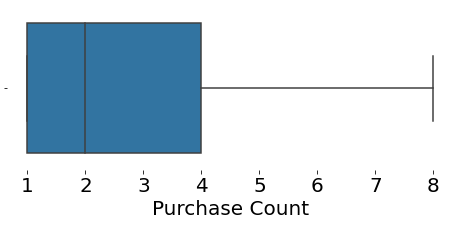

In [32]:
# Using boxplot to get statistics
plt.figure(figsize=(8,3))
sns.boxplot(retention['Purchase Count'], sym='')
plt.xticks(fontsize=20)
plt.xlabel('Purchase Count',fontsize=20)
sns.despine(left=True,bottom=True)

In [33]:
retention['Purchase Count'].mode()[0]

1

Median purchase count is 2 purchases<br>
With the mean > median, this is a positive skew<br>
75% of the users span from 1 to 4 purchases during a period<br>
Most all of customers just has odered food through the app once

In [34]:
# Categorizing customers usage
once=0
twice_to_twelfth=0
rarely=0
regular=0
for j in retention['Purchase Count']:
    if j == 1:
        once+=1
    elif j > 1 and j <=12:
        twice_to_twelfth+=1
    elif j > 12 and j <= 24:
        rarely+=1
    elif j > 20:
        regular+=1

In [35]:
print(once,twice_to_twelfth,rarely,regular)

36709 33004 3183 1672


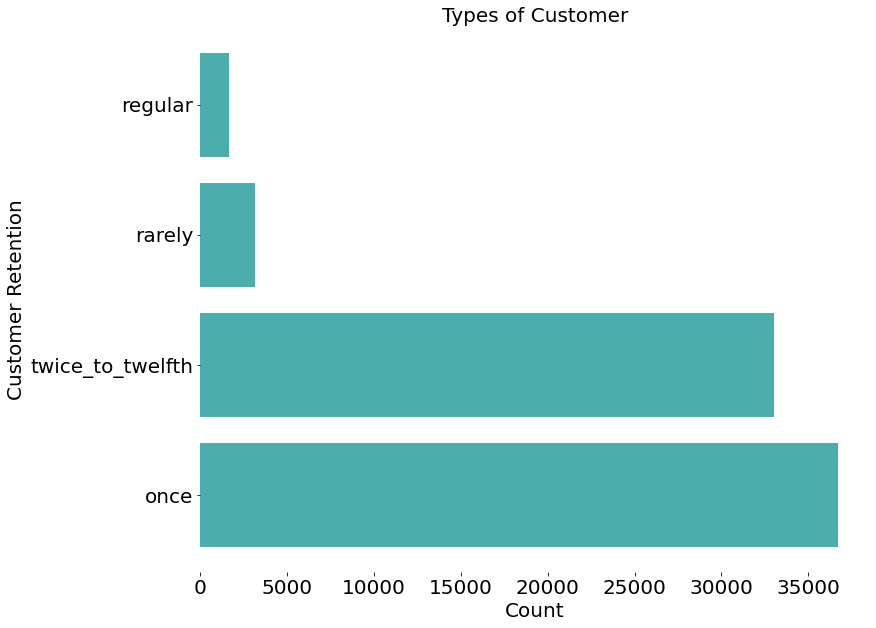

In [36]:
plt.figure(figsize=(12,10))
sizes=[once,twice_to_twelfth,rarely,regular]
labels=('once','twice_to_twelfth','rarely','regular')
y_pos=np.arange(len(labels))
ax=plt.barh(y_pos,sizes, align='center', alpha=0.7,color='#008B8B')
plt.yticks(y_pos,labels,fontsize=20)
plt.xticks(fontsize=20)
plt.ylabel('Customer Retention',fontsize=20)
plt.xlabel('Count',fontsize=20)
plt.title('Types of Customer',fontsize=20)
sns.despine(left=True,bottom=True)
plt.show()

We can see that, most of customers used the service only once (36709), next is a group of customers who purchased from twice to twelfth (33004)
in the given period time <br>
Rarely customers class is in a puchasing range between more than twelve times and average once a week in 24 weeks, individually 3183. <br>
Regular customers are the least group with 1672 people. <br>
It could be due to the delivery fee ( based on distance), somehow delaying in delivery, less discount season from restaurants<br> or retail stores together with unappropriated food price have led to the difficulty to keep customers using service regularly

## Checking monthly purchase:

In [37]:
# Using datetime library, we extracted the month, year
df2['month'] = df2['Purchases Time Delivered'].dt.month
df2['year']=df2['Purchases Time Delivered'].dt.year

In [38]:
# Showing the amount of purchases monthly
b=df2['month'].value_counts().sort_index()

In [39]:
amount=pd.DataFrame({'Month':b.index,'Purchase_Count':b.values})

In [40]:
amount

,Month,Purchase_Count
0,5,32684
1,6,41520
2,7,44313
3,8,52861
4,9,81160
5,10,46176


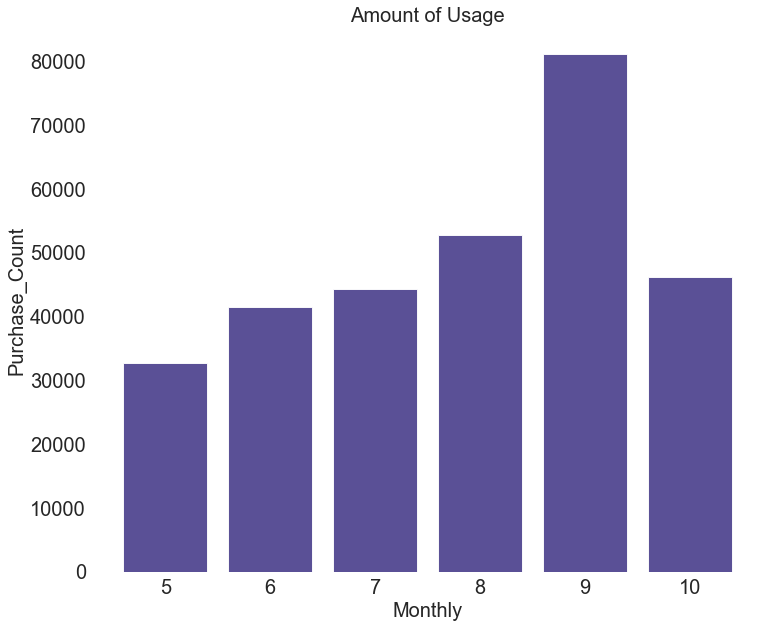

In [41]:
sns.set_style('white')
plt.figure(figsize=(12,10))
objects = amount['Month']
y_pos = np.arange(len(objects))
performance = amount['Purchase_Count']
plt.bar(y_pos, performance, align='center',color='#483D8B',alpha=0.9)
plt.xticks(y_pos, objects,fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('Purchase_Count',fontsize=20)
plt.xlabel('Monthly',fontsize=20)
plt.title('Amount of Usage',fontsize=20)
sns.despine(left=True, bottom=True)
plt.show()

## Preparing data for cohort analysis:

In [42]:
# In order to sort them in order, we should multiply the year by 100 and add the month to that value. 
# This will create an order that can be sorted correctly.
df2['cohort'] = df2.apply(lambda row: (row['year'] * 100) + (row['month']), axis=1)

In [43]:
df2

,Purchases Time Delivered,Product line,User ID,Purchase ID,Venue ID,month,year,cohort
0,2020-08-01,Restaurant,55080d6585f6661a3b37f7a5,5f3d81ef6cce0eeb05225f98,5e8b2c8be050b99f26647804,8,2020,202008
1,2020-08-01,Restaurant,55080d6585f6661a3b37f7a5,5f3c11f5a90667e766b04c19,5e8b2c8be050b99f26647804,8,2020,202008
2,2020-07-01,Retail store,556202537f84a43ac29ec7cb,5f0aec594c3cbeb4049ea36a,5ec2ab4401f812138e435c89,7,2020,202007
3,2020-07-01,Retail store,556202537f84a43ac29ec7cb,5f184a3c88046da058c5ed1d,5ec2ab4401f812138e435c89,7,2020,202007
4,2020-05-01,Restaurant,57b48aece14f6d64522f8c5f,5ecf98f34d3d68dc996dad7a,5cb4425ae93cce000d20612f,5,2020,202005
...,...,...,...,...,...,...,...,...
298709,2020-10-01,Restaurant,5f874372e71892d52313343f,5f8745bfae557239f1cbe4db,5f2d6542365ed912d6c545f2,10,2020,202010
298710,2020-10-01,Restaurant,5f874b92a026a2143bab6e63,5f874fd5e86004c65a133d47,5e6ccb03b1d0a9394d072fcd,10,2020,202010
298711,2020-10-01,Restaurant,5f874e647a7169ef6a023235,5f875660afcc5ba542f3f332,5e77a757c55bc12714975c4d,10,2020,202010
298712,2020-10-01,Restaurant,5f875552c7b1a240baf4cc97,5f87582ed5481f4e72e02218,5f4cfc839232473565cfd423,10,2020,202010


Mostly orders increase from August and September, specifically reach a peak in September with 81162 purchases.

In [44]:
# After we create a column called ‘cohort’, we will group all the orders by the CustomerID 
# and find the minimum cohort to find the cohort they belong in as their first purchase.
cohorts = df2.groupby('User ID')['cohort'].min().reset_index()

In [45]:
cohorts

,User ID,cohort
0,55080d6585f6661a3b37f7a5,202008
1,556202537f84a43ac29ec7cb,202007
2,57b48aece14f6d64522f8c5f,202005
3,57b5a1c7791b5a4aafe403ef,202010
4,582212cb8033270d91515225,202009
...,...,...
74563,5f874372e71892d52313343f,202010
74564,5f874b92a026a2143bab6e63,202010
74565,5f874e647a7169ef6a023235,202010
74566,5f875552c7b1a240baf4cc97,202010


In [46]:
# We’ll rename the columns to CustomerID and first cohort 
# Merge new DataFrame with our previous data
cohorts.columns = ['User ID', 'first_cohort']
df2 = df2.merge(cohorts, on='User ID', how='left')

In [47]:
# Define types of product line
df2['Product line'].unique()

array(['Restaurant', 'Retail store'], dtype=object)

In [48]:
# Call the “value_counts” function on cohorts column and reset the index
headers = df2['cohort'].value_counts().reset_index()

In [49]:
headers.columns = ['Cohorts', 'Count']

In [50]:
# Result in two columns of all cohorts and presenting the total amount of purchases monthly occurs
headers

,Cohorts,Count
0,202009,81160
1,202008,52861
2,202010,46176
3,202007,44313
4,202006,41520
5,202005,32684


In [51]:
# Result in an ordered list of cohorts
headers = headers.sort_values(['Cohorts'])['Cohorts'].to_list()
headers

[202005, 202006, 202007, 202008, 202009, 202010]

In [70]:
# In order to create a cohort analysis, we need to create a DataFrame that has an index of each user’s first month of making a purchase 
# and the amount of times that the percent that made a purchase in the subsequent months.
# Cohort distance will be the amount of months between the current order and the first purchase from the customer
df2['cohort_distance'] = df2['cohort'] - df2['first_cohort']

In [71]:
df2

,Purchases Time Delivered,Product line,User ID,Purchase ID,Venue ID,month,year,cohort,first_cohort,cohort_distance
0,2020-08-01,Restaurant,55080d6585f6661a3b37f7a5,5f3d81ef6cce0eeb05225f98,5e8b2c8be050b99f26647804,8,2020,202008,202008,0
1,2020-08-01,Restaurant,55080d6585f6661a3b37f7a5,5f3c11f5a90667e766b04c19,5e8b2c8be050b99f26647804,8,2020,202008,202008,0
2,2020-07-01,Retail store,556202537f84a43ac29ec7cb,5f0aec594c3cbeb4049ea36a,5ec2ab4401f812138e435c89,7,2020,202007,202007,0
3,2020-07-01,Retail store,556202537f84a43ac29ec7cb,5f184a3c88046da058c5ed1d,5ec2ab4401f812138e435c89,7,2020,202007,202007,0
4,2020-05-01,Restaurant,57b48aece14f6d64522f8c5f,5ecf98f34d3d68dc996dad7a,5cb4425ae93cce000d20612f,5,2020,202005,202005,0
...,...,...,...,...,...,...,...,...,...,...
298709,2020-10-01,Restaurant,5f874372e71892d52313343f,5f8745bfae557239f1cbe4db,5f2d6542365ed912d6c545f2,10,2020,202010,202010,0
298710,2020-10-01,Restaurant,5f874b92a026a2143bab6e63,5f874fd5e86004c65a133d47,5e6ccb03b1d0a9394d072fcd,10,2020,202010,202010,0
298711,2020-10-01,Restaurant,5f874e647a7169ef6a023235,5f875660afcc5ba542f3f332,5e77a757c55bc12714975c4d,10,2020,202010,202010,0
298712,2020-10-01,Restaurant,5f875552c7b1a240baf4cc97,5f87582ed5481f4e72e02218,5f4cfc839232473565cfd423,10,2020,202010,202010,0


## Cohort based monthly retention for Restaurant product line:

In [54]:
# Product line for restaurant
restaurant=df2[df2['Product line']=='Restaurant']

In [55]:
restaurant

,Purchases Time Delivered,Product line,User ID,Purchase ID,Venue ID,month,year,cohort,first_cohort,cohort_distance
0,2020-08-01,Restaurant,55080d6585f6661a3b37f7a5,5f3d81ef6cce0eeb05225f98,5e8b2c8be050b99f26647804,8,2020,202008,202008,0
1,2020-08-01,Restaurant,55080d6585f6661a3b37f7a5,5f3c11f5a90667e766b04c19,5e8b2c8be050b99f26647804,8,2020,202008,202008,0
4,2020-05-01,Restaurant,57b48aece14f6d64522f8c5f,5ecf98f34d3d68dc996dad7a,5cb4425ae93cce000d20612f,5,2020,202005,202005,0
5,2020-05-01,Restaurant,57b48aece14f6d64522f8c5f,5ed37adbacce7cf8bbbcf9a9,5e6a936291ac996202316a1e,5,2020,202005,202005,0
6,2020-05-01,Restaurant,57b48aece14f6d64522f8c5f,5ec6b23c96741b6db6266639,5d7a32a73b546fccd88a05e9,5,2020,202005,202005,0
...,...,...,...,...,...,...,...,...,...,...
298709,2020-10-01,Restaurant,5f874372e71892d52313343f,5f8745bfae557239f1cbe4db,5f2d6542365ed912d6c545f2,10,2020,202010,202010,0
298710,2020-10-01,Restaurant,5f874b92a026a2143bab6e63,5f874fd5e86004c65a133d47,5e6ccb03b1d0a9394d072fcd,10,2020,202010,202010,0
298711,2020-10-01,Restaurant,5f874e647a7169ef6a023235,5f875660afcc5ba542f3f332,5e77a757c55bc12714975c4d,10,2020,202010,202010,0
298712,2020-10-01,Restaurant,5f875552c7b1a240baf4cc97,5f87582ed5481f4e72e02218,5f4cfc839232473565cfd423,10,2020,202010,202010,0


There are 287921 orders from Restaurant

In [56]:
restaurant['cohort_distance'].unique()

array([0, 1, 2, 3, 5, 4], dtype=int64)

In [57]:
# Create a DataFrame that has its rows mark the first purchase cohort while the columns are the months since. 
# The values inside will signify how many customers from that cohort purchases in that period. 
# The first column will always be the largest.
cohort_pivot_restaurant = pd.pivot_table(restaurant, index='first_cohort', columns='cohort_distance', values='User ID', aggfunc=pd.Series.nunique)

In [58]:
# Pivot_table method allows us to pivot our data so that we can calculate the amount of unique customers 
# in each cohort based on that purchases distance from their first purchase in months.
cohort_pivot_restaurant

cohort_distance,0,1,2,3,4,5
first_cohort,,,,,,
202005,16874.0,6107.0,4766.0,4483.0,4753.0,3446.0
202006,11280.0,3955.0,3369.0,3309.0,2299.0,NaN
202007,9140.0,3042.0,2731.0,1916.0,NaN,NaN
202008,9938.0,3436.0,2205.0,NaN,NaN,NaN
202009,16259.0,4669.0,NaN,NaN,NaN,NaN
202010,7838.0,NaN,NaN,NaN,NaN,NaN


In [59]:
# Divide each row by the first column 
# so that we can have a percentage of the customers that have returned from that cohort to make a purchase
# by using the div function
cohort_pivot_restaurant = cohort_pivot_restaurant.div(cohort_pivot_restaurant[0],axis=0)

In [60]:
cohort_pivot_restaurant

cohort_distance,0,1,2,3,4,5
first_cohort,,,,,,
202005,1.0,0.361918,0.282446,0.265675,0.281676,0.20422
202006,1.0,0.350621,0.298670,0.293351,0.203812,NaN
202007,1.0,0.332823,0.298796,0.209628,NaN,NaN
202008,1.0,0.345744,0.221876,NaN,NaN,NaN
202009,1.0,0.287164,NaN,NaN,NaN,NaN
202010,1.0,NaN,NaN,NaN,NaN,NaN


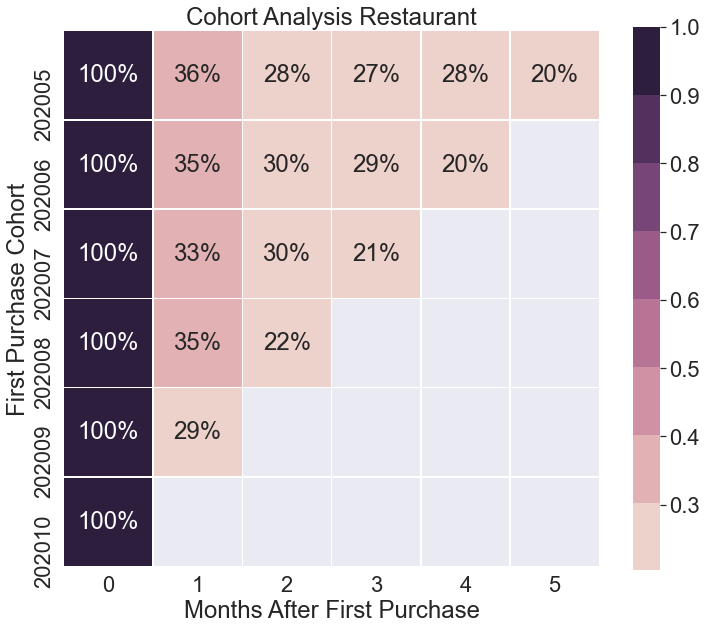

In [61]:
# Heatmap out of cohort analysis
plt.figure(figsize=(12,10))
sns.set(font_scale=2)
y_labels = [str(int(header)%100) + '-' + str(int(header)/100) for header in headers]
x_labels = range(0, len(y_labels))
plt.yticks(ticks=headers, labels=y_labels)
plt.xticks(ticks=x_labels, labels=x_labels)
plt.title("Cohort Analysis Restaurant")
sns.heatmap(cohort_pivot_restaurant, annot=True, fmt='.0%', mask=cohort_pivot_restaurant.isnull(), square=True, linewidths=.5, cmap=sns.cubehelix_palette(8),robust=True)
plt.xlabel('Months After First Purchase')
plt.ylabel('First Purchase Cohort')
plt.show()

In the restaurant field, all types of customer tend to order less in the next few months. <br>
I assume that the price for food from restaurants are more expensive and maybe less discount season.<br>
Another reason would be shipping fee due to a further location from restaurant to customer's address

## Cohort based monthly retention for Retail product line:

In [62]:
# Product line for retail store
retail=df2[df2['Product line']=='Retail store']

In [63]:
retail

,Purchases Time Delivered,Product line,User ID,Purchase ID,Venue ID,month,year,cohort,first_cohort,cohort_distance
2,2020-07-01,Retail store,556202537f84a43ac29ec7cb,5f0aec594c3cbeb4049ea36a,5ec2ab4401f812138e435c89,7,2020,202007,202007,0
3,2020-07-01,Retail store,556202537f84a43ac29ec7cb,5f184a3c88046da058c5ed1d,5ec2ab4401f812138e435c89,7,2020,202007,202007,0
12,2020-09-01,Retail store,58653b9279f65127b206770e,5f6cc5e0e6e850a1860e2145,5ec2ab4401f812138e435c89,9,2020,202009,202009,0
13,2020-09-01,Retail store,58653b9279f65127b206770e,5f74bf6997b7683d701b2e3e,5f2d15d601afb21ec6c0dfdf,9,2020,202009,202009,0
14,2020-05-01,Retail store,58d7fba58033271c5a3a9caf,5ecf795e525deec14d142f33,5e73cb5d891277fa4aa54e24,5,2020,202005,202005,0
...,...,...,...,...,...,...,...,...,...,...
298308,2020-10-01,Retail store,5f859dedb9aba42d12676d48,5f85ba652239d4d7258cbc60,5e73cb5d891277fa4aa54e24,10,2020,202010,202010,0
298379,2020-10-01,Retail store,5f85cf7dd2e602d4b45d2cce,5f8729647ccb7de6c66c3f34,5e73cb5d891277fa4aa54e24,10,2020,202010,202010,0
298392,2020-10-01,Retail store,5f85d46ce092f8028962d76a,5f86fed2629cfe4db11d036f,5ea2e5166a0b5ae76f4d3c21,10,2020,202010,202010,0
298609,2020-10-01,Retail store,5f87027440cb30e327ce24c6,5f8703ff3acebf25456c2e16,5ecd33c7c9f93bac27626c62,10,2020,202010,202010,0


There are 10793 orders from Retail Store

In [64]:
retail['cohort_distance'].unique()

array([0, 1, 2, 3, 4, 5], dtype=int64)

In [65]:
cohort_pivot_retail = pd.pivot_table(retail, index='first_cohort', columns='cohort_distance', values='User ID', aggfunc=pd.Series.nunique)

In [66]:
cohort_pivot_retail

cohort_distance,0,1,2,3,4,5
first_cohort,,,,,,
202005,1034.0,296.0,208.0,188.0,231.0,170.0
202006,643.0,170.0,148.0,180.0,100.0,NaN
202007,430.0,133.0,134.0,60.0,NaN,NaN
202008,544.0,202.0,87.0,NaN,NaN,NaN
202009,873.0,195.0,NaN,NaN,NaN,NaN
202010,305.0,NaN,NaN,NaN,NaN,NaN


In [67]:
cohort_pivot_retail = cohort_pivot_retail.div(cohort_pivot_retail[0],axis=0)

In [68]:
cohort_pivot_retail

cohort_distance,0,1,2,3,4,5
first_cohort,,,,,,
202005,1.0,0.286267,0.201161,0.181818,0.223404,0.16441
202006,1.0,0.264386,0.230171,0.279938,0.155521,NaN
202007,1.0,0.309302,0.311628,0.139535,NaN,NaN
202008,1.0,0.371324,0.159926,NaN,NaN,NaN
202009,1.0,0.223368,NaN,NaN,NaN,NaN
202010,1.0,NaN,NaN,NaN,NaN,NaN


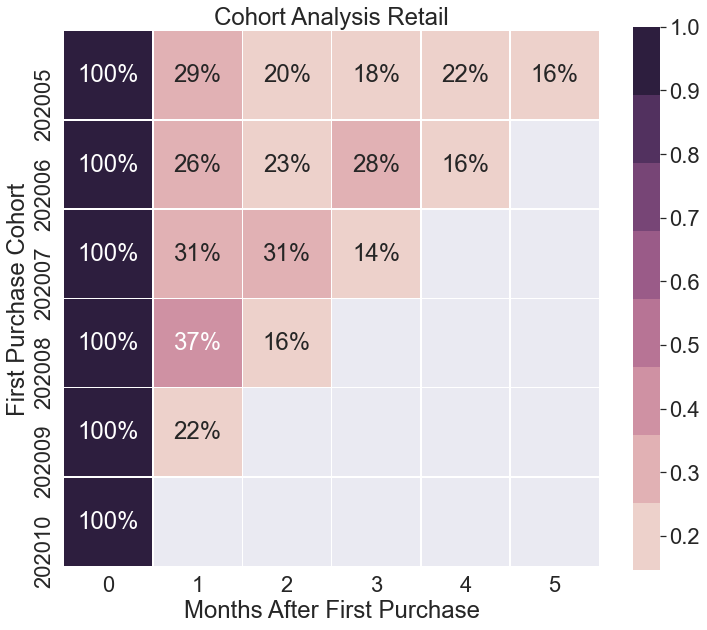

In [69]:
plt.figure(figsize=(12,10))
sns.set(font_scale=2)
y_labels = [str(int(header)%100) + '-' + str(int(header)/100) for header in headers]
x_labels = range(5, 11)
plt.yticks(ticks=headers, labels=y_labels)
plt.xticks(ticks=x_labels, labels=x_labels)
plt.title("Cohort Analysis Retail")
sns.heatmap(cohort_pivot_retail, annot=True, fmt='.0%', mask=cohort_pivot_retail.isnull(), square=True, linewidths=.5, cmap=sns.cubehelix_palette(8),robust=True)
plt.xlabel('Months After First Purchase')
plt.ylabel('First Purchase Cohort')
plt.show()

The customer's purchase behavior in the retail ordering is quite fluctuated.<br>
For customers who have first purchases in May tend to order less from next few months<br>
But customers who have first purchases in June, they increasingly order more in August<br>
Customers who have first purchases in July maintain the order rate from August to September (31%) then bottom down in October.<br>
Customers who have first purchases in August have the most order maintaining rate on September (37%)<br>
In conclusion, most customers have registered to the service and regularly used to order food from June to September (Summer and Autumn season)

Beside the retention, I would chose to explore time delivery (on time delivering is important to a customer service), ratings and comments to analyze customers satisfaction to a product/service and listen to their needs to improve more.